# Lab 11: Environmental Economics

In [9]:
#Import packages
from datascience import *
import matplotlib.pyplot as plt
%matplotlib inline 

import numpy as np
import pandas as pd
from matplotlib import patches

Welcome to lab 11!

In this lab, you will investigate how policies regarding environmental protection are determined and how they differ, how the MAC curve advises an alternative of abatement technologies to taxation, and how the Environmental Kuznets curve hypothesis say about the possible association between GDP per capita and CO2 emissions per capita.

## Environmental Policy Making

### Question 1
Let's first look at government intervention in the realm of environmental economics.

One tenet of Environmental Economics is that the enjoyment of **“environmental amenities”** (or conversely that the usage or degradation of those resources) has an intrinsic value to humans that goes unaccounted for in the purely market-based model. These unaccounted costs are considered **market failures** and carry **negative externalities**.

The greatest single example of a negative externality of global importance is the emission of greenhouse gases (carbon dioxide, methane, nitrous oxide) from the combustion of hydrocarbons (coal, gasoline, diesel, oil). The true cost is not reflected in the lower price one pays at e.g the gas station. Consequently, the equilibrium quantity consumed is higher than the socially optimal quantity. Environmental economists seek to model the costs and benefits of a reduction. How could we reduce the quantity to the social optimum and weigh in the costs and benefits of such a reduction?

As a result, a major proportion of research and work within the field is devoted to building tools to reveal, address, and evaluate economic policies aimed at internalizing these externalities.

Very often, these policy tools as applied by a government constitute interfering with the market to a varying degree. We can model environmental economic policies into two subsets:

**Command and Control:** When the government limits the amount of pollution to control a negative externality, e.g letting each emitter in the market emit a fixed amount of GHG gases.

**Market-based:** Where the government sets an emission goal, then introduces incentives or subsidies to alter market behavior. It is left to each market actor to decide how much to emit. A carbon tax and a cap-and-trade (carbon quotas) are examples of marked-based interventions.

**Question 1.1:** Explain how an excise tax could internalize a negative externality and encourage a certain level of abatement.

*Enter your answer here...*

A negative externality of production, for example carbon emissions, causes a divergence between social marginal cost and private marginal cost curves, leading to society experiencing additional spillover costs. This leads to emissions greater than the optimal quantity. The rate of a Pigouvian tax is equal to the social marginal cost of the negative externality. The tax pushes the private marginal cost towards the higher social marginal cost of emissions, decreasing the supply curve. This leads to a reduced equilibrium at the optimal quantity of emissions in society.

**Question 1.2:** How can permits be traded between emitters in cap and trade schemes?

*Enter your answer here...*

Producers that emit more CO2 can buy permits from producers that emit less and do not use all their permits. Firms that implement abatement technologies may have permits to spare, and they may sell them to firms who choose to stay business-as-usual and need to buy more "rights to pollute".

**Question 1.3:** How might permits be better at encouraging reducing emissions compared to taxes?

*Enter your answer here...*

Permits directly control how much firms can pollute. With permits, although firms are incentivized to pollute less, they can technically still pollute and pay the tax. The tax only has an indirect effect on pollution. In contrast, permits set a hard cap on how much producers can pollute, thus incentivizing them to pursue more efficient and environmentally friendly production methods. Permits have a more direct effect on reducing pollution.

## Constructing a MAC Curve

### Question 2
Let's now look at the Marginal Abatement Cost (MAC) Curve.

The Marginal Abatement Cost Curve gives policy makers and firms an opportunity to differentiate the costs of the multiple approaches we have in reducing our carbon (CO2) emissions. It shows where society can get the best “bang for the buck” when the goal is to abate carbon emissions. Each rectangle represents a specific technology or policy (e.g switch to LED lights or install Carbon Capture Systems (CCS) in older coal plants).

**Question 2.1:** What do the X and Y axes of a MAC curve represent?

*Enter your answer here...*

X: Abatement potential in (GtCO2 per year), Y: Abatement cost € per ton of CO2

**Question 2.2:** Why are the costs of some abatement technologies negative?

*Enter your answer here...*

Within our current market model, there exists inefficiencies such as lack of incentives or information that prohibit market participants from taking the full advantage of the returns offered from investing in technologies with negative costs.

**Question 2.3:** How might the Emissions Abatement alternative promote a greater reduction in CO2 compared to the Business-as-Usual (BAU) alternative?

*Enter your answer here...*

In [ ]:
abatement_table = Table.read_table("abatement_data.csv").where('Cost',are.between(-10.1,10)).where('Possible Savings', are.below(200)).drop('Emissions').relabel('Possible Savings', 'Abatement Potential').relabel('Cost','Abatement Cost')
abatement_table.show(5)

**Question  2.4:** We would like to construct an MAC for all abatement technologies in the Asia Pacific region. Create a table containing all abatement technologies in the Asia Pacific region with columns `Abatement Potential` and `Abatement Cost`.

In [ ]:
abatement_table_ap = abatement_table.where('Region', 'Asia Pacific').select('Abatement Potential', 'Abatement Cost')
abatement_table_ap

**Question 2.5:** Calculate the total abatement for a tax of $4.

In [ ]:
abatement_under_4 = abatement_table_ap.where(...)
abatement_at_4 = sum(...)
abatement_at_4

In [38]:
abatement_under_4 = abatement_table_ap.where('Abatement Cost', are.below_or_equal_to(4))
abatement_at_4 = sum(abatement_under_4.column('Abatement Potential'))
abatement_at_4

4579.399996707216

**Question 2.6:** Define a function that calculates the total abatement for a given tax level.

In [ ]:
def total_abatement(tax_level):
    abatement_under_tax = ...
    return ...

In [20]:
def total_abatement(tax_level):
    abatement_under_tax = abatement_table_ap.where('Abatement Cost', are.below_or_equal_to(tax_level))
    return sum(abatement_under_tax.column('Abatement Potential'))

In [21]:
total_abatement(4)

4579.399996707216

**Question 2.7:** Create a table of abatement technologies using `abatement_table_ap` we can use to create an MAC. The table should contain a column titled `Abatement Cost` containing the cost of abatements sorted in ascending order, and `Cumulative Abatement Potential` containing the cumulative abatement potential of all technologies with cost at or below the corresponding abatement cost.

In [ ]:
cumulative_potential = ...
abatement_table_cumulative = abatement_table_ap.with_column(...)
abatement_cumulative_sorted = ...
abatement_cumulative_sorted

In [15]:
cumulative_potential = np.cumsum(abatement_table_ap.column(0))
abatement_table_cumulative = abatement_table_ap.with_column('Cumulative Abatement Potential', cumulative_potential)
abatement_cumulative_sorted = abatement_table_cumulative.drop('Abatement Potential').sort('Abatement Cost')
abatement_cumulative_sorted

Abatement Cost,Cumulative Abatement Potential
-6.2,0.25
-6.18,0.25
-5.84,0.27
-5.84,0.28
-5.84,0.9
-5.58,0.9
-5.58,0.9
-5.57,1.49
-5.33,4.24
-5.33,5.15


Using this information, we can then plot our MAC curve.

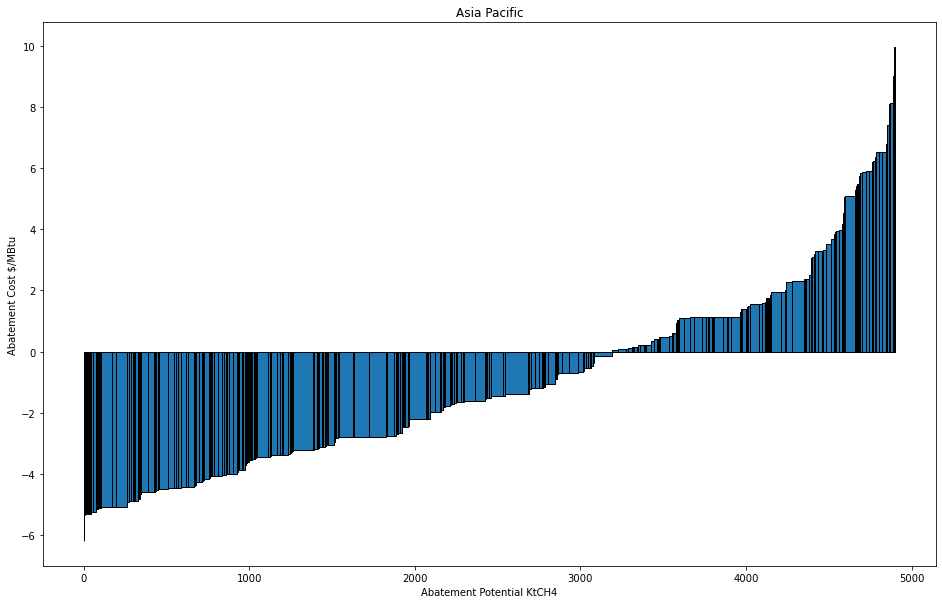

In [36]:
#for plotting, don't change this
def find_x_pos(widths):
    cumulative_widths = [0]
    cumulative_widths.extend(np.cumsum(widths))
    half_widths = [i/2 for i in widths]
    x_pos = []
    for i in range(0, len(half_widths)):
        x_pos.append(half_widths[i] + cumulative_widths[i])
    return x_pos
width_group = abatement_table_ap.column('Abatement Potential')
height_group = abatement_table_ap.column('Abatement Cost')
new_x_group = find_x_pos(width_group)

plt.figure(figsize=(16,10))
plt.title('Asia Pacific')
plt.xlabel('Abatement Potential KtCH4')
plt.ylabel('Abatement Cost $/MBtu')

plt.bar(new_x_group, height_group,width=width_group,edgecolor = 'black')
plt.show()

**Question 2.8:** What are two limitations of the MAC? Describe each in 2 sentences.

*Enter your answer here...*

The MAC curve does not consider capital intensity, the upfront investment of an abatement technology. Some technologies may have low marginal abatement cost but high capital intensity, thus difficult to implement despite appearing attractive on the MAC.

The MAC curve also does not consider dynamic costs, the potential cost-reductions from increased efficiency, learning-by-doing, and other posiitve spillovers. Thus, the MAC tends to overestimate the costs of an abatement technology.

### Question 3
Finally, we take a look at the Environmental Kuznets curve hypothesis.

The Environmental Kuznets curve hypothesis that the economic development of a nation is associated with a downward-facing U-shape.  The Y-axis is in terms of the level of environmental degradation (e.g pollution, water quality, deforestation.  The X-axis would be the GDP/capita.  The idea is that the environmental degradation worsens, until a certain level of income, and after which it gets better. In the US this could be seen in terms of air or water quality, where the skies or rivers were very polluted in the 1960s, until the Clean Air Act and Clean Water Act were passed and Air Quality and Water Quality improved.

In [10]:
co2_table = Table.read_table('co2-emissions-vs-gdp.csv').select('Entity', 'Year', 'Per capita CO2 emissions', 'GDP per capita')
co2_table = co2_table.relabeled('Entity', 'Country')
co2_table

Country,Year,Per capita CO2 emissions,GDP per capita
Abkhazia,2015,nan,nan
Afghanistan,1949,0.00191237,nan
Afghanistan,1950,0.010871,1156
Afghanistan,1951,0.0116837,1170
Afghanistan,1952,0.0115423,1189
Afghanistan,1953,0.0132159,1240
Afghanistan,1954,0.0130359,1245
Afghanistan,1955,0.0186057,1246
Afghanistan,1956,0.0218121,1278
Afghanistan,1957,0.0343433,1253


**Question 3.1:** Write a function that generates an Environmental Kuznets Curve for any country of choice.

In [51]:
def Kuznets(country):
    country_tbl = ...
    country_tbl.scatter(...)
    plt.title('Environmental Kuznets Curve for ' + country)

In [6]:
def Kuznets(country):
    country_tbl = co2_table.where('Country', country)
    country_tbl.scatter('GDP per capita', 'Per capita CO2 emissions')
    plt.title('Environmental Kuznets Curve for ' + country)

**Question 3.2:** Using the function above, generate an Environment Kuznets curve for the United States.

...

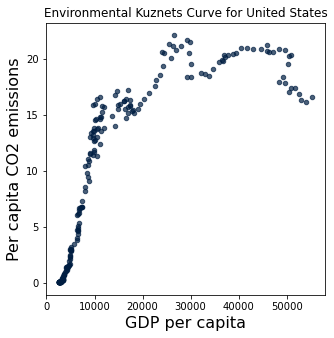

In [11]:
Kuznets('United States')

**Question 3.3:** Why might the Environmental Kuznets curve have an inverted ‘U’ shape?

*Enter your answer here...*

As countries develop, their production levels increase. In order to cut costs, most manufactures will likely implement less environmentally friendly production methods, leading to greater levels of pollution and forming the upwards sloping portion of the Environmental Kuznets Curve. However, as the population becomes wealthier, society grows more environmentally conscious thus demanding more sustainable alternatives, hence leading to the downward sloping portion of the curve.

**Question 3.4:** Generate an Environmental Kuznets curve for a country of your choice

In [6]:
...

Ellipsis

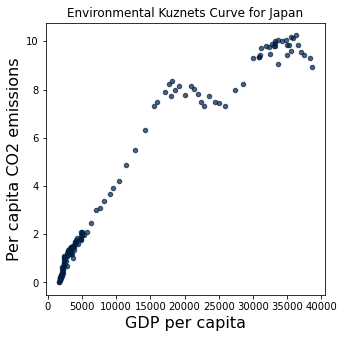

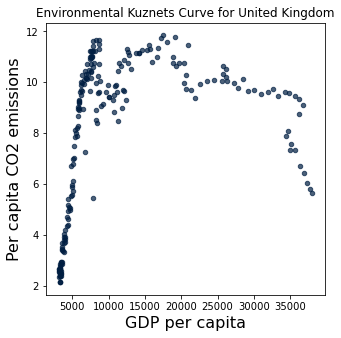

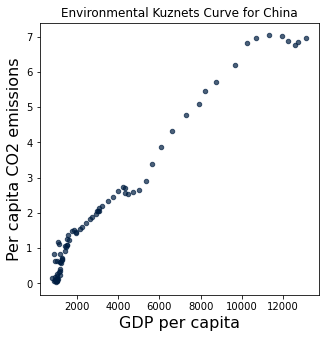

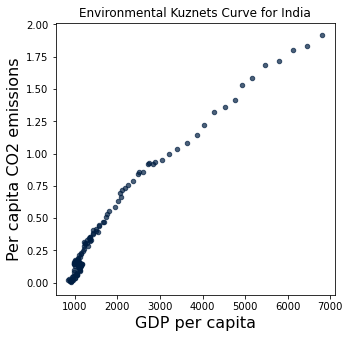

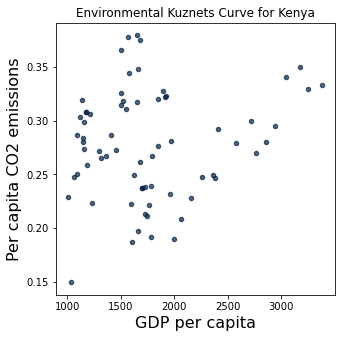

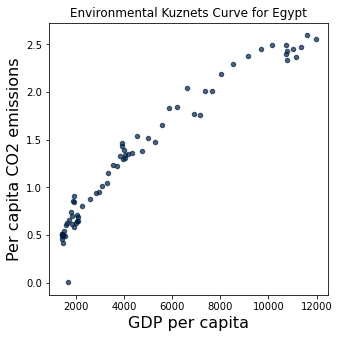

In [53]:
#any country
Kuznets('Japan')
Kuznets('United Kingdom')
Kuznets('China')
Kuznets('India')
Kuznets('Kenya')
Kuznets('Egypt')

**Question 3.5:** What do you observe? Does the data prove or disprove our hypothesis? Why or why not?

*Enter your answer here...*

Developing countries (e.g. China, India): only upwards sloping portion
Developed countries (e.g. UK, US, Germany): inverse 'U' shape
Less-developed countries (e.g. Kenya): seemingly no correlation

Usually the data follows the hypothesis of the Environmental Kuznets Curve, depending on the stage of development for each country. For example, developing countries like the UK see a large reduction in CO2 emissions per capita perhaps due to more environmentally conscious consumers. China and India are developing, thus see a large amount of growth in their GDP as well as CO2 emissions. Finally, less developed countries may still have lacking production industries, thus showing less of a correlation between GDP and emissions.

**Question 3.6:** What are two potential issues of our assumption for the Environmental Kuznets curve? Describe each in 2 sentences.

*Enter your answer here...*

An apparent trend between CO2 and GDP does not mean all types of environmental degradation follow the curve. The Environmental Kuznets curve may not be an one-size-fit-all solution.

We are plotting the curve for GDP and CO2 per capita. However, this does not mean the absolute amount of emission is dropping, and we might still not be contributing positively to the environment.

At this point we have yet to see whether the curve holds its shape over the long term. Would carbon emissions keep falling? Will they flatten out at some point?

Any reasonable discussion.

**Question 3.7** How might implementing emissions abatement technologies be more beneficial compared to the Business-as-Usual (BAU) alternative?

*Enter your answer here...*

Implementing abatement reduction technologies help set up technologies that can continuously reduce environmental degradation in the future at low costs.

Abatement technologies promote technological advance to help reduce any inefficiencies in current production systems, thus reducing the negative externalities on environment to start with.

Government policies such as taxes pushes up prices, where as more efficient production processes using abatement technologies can reduce costs and thus benefit consumers.

Any reasonable discussion.

**Congratulations! You finished Lab 11!**